# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [125]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [110]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

In [111]:
cities

['ribeira grande',
 'namibe',
 'okato',
 'rikitea',
 'katsuura',
 'albany',
 'tecoanapa',
 'punta arenas',
 'qaanaaq',
 'hobart',
 'upernavik',
 'torbat-e jam',
 'faanui',
 'mataura',
 'sobolevo',
 'atuona',
 'lavrentiya',
 'tuktoyaktuk',
 'yellowknife',
 'chokurdakh',
 'fairbanks',
 'yulara',
 'busselton',
 'hermanus',
 'ushuaia',
 'vaini',
 'barrow',
 'dikson',
 'rawson',
 'muroto',
 'klaksvik',
 'kapaa',
 'mezen',
 'puerto ayora',
 'dharan',
 'mar del plata',
 'skelleftea',
 'denia',
 'samalaeulu',
 'thompson',
 'hilo',
 'arraial do cabo',
 'kamenskoye',
 'nova role',
 'chiredzi',
 'east london',
 'saint-francois',
 'laguna',
 'mackenzie',
 'kodiak',
 'cabo san lucas',
 'warqla',
 'geraldton',
 'bredasdorp',
 'coihaique',
 'tsihombe',
 'port alfred',
 'belushya guba',
 'marsh harbour',
 'cape town',
 'jamestown',
 'touros',
 'vestmanna',
 'rio grande',
 'souillac',
 'talnakh',
 'cap-aux-meules',
 'saint george',
 'kirakira',
 'kavaratti',
 'lompoc',
 'butaritari',
 'bethel',
 'pevek

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [112]:
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="

In [113]:
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []
valid_city =[]

In [114]:
response = requests.get(query_url + "hermanus").json()
pprint(response)

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -34.42, 'lon': 19.23},
 'dt': 1605073273,
 'id': 3366880,
 'main': {'feels_like': 59.76,
          'humidity': 74,
          'pressure': 1025,
          'temp': 62.01,
          'temp_max': 62.01,
          'temp_min': 62.01},
 'name': 'Hermanus',
 'sys': {'country': 'ZA',
         'id': 2006131,
         'sunrise': 1605065573,
         'sunset': 1605115292,
         'type': 3},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 65, 'gust': 13, 'speed': 5.99}}


In [115]:
for city in cities:
     try:
#       response = requests.get(query_url + city.replace(" ","&")).json()
#       cloudinesses.append(response['clouds']['all'])
#         print(city)
      
        response = requests.get(query_url + city.replace(" ","&")).json()
#         print(response)
        valid_city.append(city)
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
     except Exception:
        print("City not found. Skipping...")


City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skip

In [116]:
print(len(valid_city))

594


In [117]:
print(len(cloudinesses))
        

510


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [118]:
weather_dict = {
    "City":valid_city[:500],
    "Cloudiness":cloudinesses[:500],
    "Country":countries[:500],
    "Date":dates[:500],
    "Humidity":humidities[:500],
    "Lat":lats[:500],
    "Lng":lngs[:500],
    "Max Temp":max_temps[:500],
    "Wind Speed":wind_speeds[:500]
}

In [120]:
weather_dict_summary =pd.DataFrame(weather_dict)
weather_dict_summary

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ribeira grande,75,ES,1605073307,87,42.75,-8.44,50.00,9.17
1,namibe,20,AO,1605073084,80,-15.20,12.15,73.17,1.25
2,okato,63,NZ,1605073606,77,-39.20,173.88,57.99,7.00
3,rikitea,0,PF,1605073277,77,-23.12,-134.97,73.47,19.95
4,katsuura,75,JP,1605073311,41,35.13,140.30,64.00,17.22
...,...,...,...,...,...,...,...,...,...
495,lagoa,75,TR,1605073708,82,40.50,38.50,57.20,6.93
496,salinopolis,0,BW,1605073709,56,-23.40,21.72,74.30,5.19
497,coahuayana,97,PE,1605073709,98,-8.48,-74.81,72.84,2.30
498,krasnopillya,1,US,1605073293,100,40.60,-124.16,42.01,4.07


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [123]:
humidityGreater100 = weather_dict_summary['Humidity'] < 100
weather_dict_humid_100_filtered = weather_dict_summary.loc[humidityGreater100]
weather_dict_humid_100_filtered

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ribeira grande,75,ES,1605073307,87,42.75,-8.44,50.00,9.17
1,namibe,20,AO,1605073084,80,-15.20,12.15,73.17,1.25
2,okato,63,NZ,1605073606,77,-39.20,173.88,57.99,7.00
3,rikitea,0,PF,1605073277,77,-23.12,-134.97,73.47,19.95
4,katsuura,75,JP,1605073311,41,35.13,140.30,64.00,17.22
...,...,...,...,...,...,...,...,...,...
494,deh rawud,75,MX,1605073513,88,21.17,-86.85,77.00,6.93
495,lagoa,75,TR,1605073708,82,40.50,38.50,57.20,6.93
496,salinopolis,0,BW,1605073709,56,-23.40,21.72,74.30,5.19
497,coahuayana,97,PE,1605073709,98,-8.48,-74.81,72.84,2.30


In [126]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
weather_dict_humid_100_filtered.to_csv(output_data_file)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

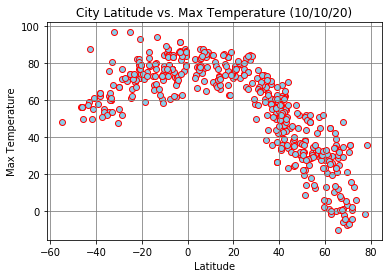

In [129]:

plt.scatter(weather_dict_humid_100_filtered["Lat"],weather_dict_humid_100_filtered["Max Temp"],edgecolors="red",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (10/10/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")
plt.savefig("fig1.png")
plt.show()

## Latitude vs. Humidity Plot

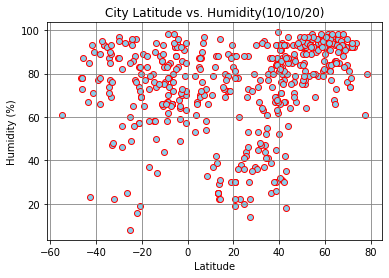

In [131]:
plt.scatter(weather_dict_humid_100_filtered["Lat"],weather_dict_humid_100_filtered["Humidity"],edgecolors="red",facecolors="skyblue")
plt.title("City Latitude vs. Humidity(10/10/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")
plt.savefig("fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

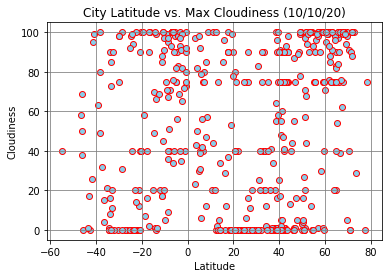

In [132]:
plt.scatter(weather_dict_humid_100_filtered["Lat"],weather_dict_humid_100_filtered["Cloudiness"],edgecolors="red",facecolors="skyblue")
plt.title("City Latitude vs. Max Cloudiness (10/10/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")
plt.savefig("fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

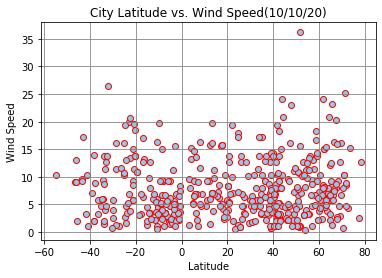

In [133]:
plt.scatter(weather_dict_humid_100_filtered["Lat"],weather_dict_humid_100_filtered["Wind Speed"],edgecolors="red",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed(10/10/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")
plt.savefig("fig4.png")
plt.show()